In [1]:
import pandas as pd
import numpy as np
import subprocess
import json
import ast

import matplotlib.pyplot as plt

#from MoNA_reader import process_json_file
from MoNA_reader_test import *#process_json_file as process_json_file_test, read_line
from spectra_plotting import *

In [2]:
csv_pth = "data/MoNA/"

In [3]:
'''
df = None
for i in range(1,9):
    if i == 1:
        df = pd.read_csv(csv_pth + "in-silico1.csv")
    else:
        df = pd.concat([df,pd.read_csv(csv_pth + "in-silico"+str(i)+".csv")])
df.reset_index(inplace=True, drop=True)
df.to_csv(csv_pth + "in-silico.csv")
'''
df = pd.read_csv('data/MoNA/in-silico.csv') 
df2 = pd.read_csv('data/GNPS/ALL_GNPS_cleaned.csv')

/tmp/ipykernel_83597/3359628740.py:11: DtypeWarning: Columns (6,7,10,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/MoNA/in-silico.csv')
/tmp/ipykernel_83597/3359628740.py:12: DtypeWarning: Columns (4,13,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('data/GNPS/ALL_GNPS_cleaned.csv')


In [4]:
df

,Unnamed: 0,kind,name,molecular_formula,SMILES,pubchem_cid,InChI,InChIKey,total_exact_mass,exact_mass,instrument,instrument_type,ms_level,ionization,ionization_mode,spectrum,score
0,0,biological,"2,3,5-Trimethyl-1H-indole, TMS derivative",C14H21NSi,C1=CC2=C(C=C1C)C(=C(N2[Si](C)(C)C)C)C,NaN,InChI=1S/C14H21NSi/c1-10-7-8-14-13(9-10)11(2)1...,KHKJMJPOXGEQGW-UHFFFAOYSA-N,231.144326,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 0.4), (27.0, 5.7), (28.0, 6.8), (29.0,...",3.571429
1,1,biological,"Ethyl 3-hydroxy-3-methylpentanoate, TMS deriva...",C11H24O3Si,O=C(OCC)CC(O[Si](C)(C)C)(C)CC,NaN,"InChI=1S/C11H24O3Si/c1-7-11(3,14-15(4,5)6)9-10...",FGZVHXCJVPTHKF-UHFFFAOYSA-N,232.149471,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 5.4), (16.0, 0.2), (27.0, 9.7), (28.0,...",3.571429
2,2,biological,"L-Valine, TMS derivative",C8H19NO2Si,O=C(O[Si](C)(C)C)C(N)C(C)C,NaN,"InChI=1S/C8H19NO2Si/c1-6(2)7(9)8(10)11-12(3,4)...",IJGIMCZHMYSSHY-ZETCQYMHSA-N,189.118505,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 4.9), (28.0, 0.1), (42.0, 0.1), (43.0,...",3.571429
3,3,biological,"Methyl 3-hydroxybutyrate, TMS derivative",C8H18O3Si,O=C(OC)CC(O[Si](C)(C)C)C,NaN,"InChI=1S/C8H18O3Si/c1-7(6-8(9)10-2)11-12(3,4)5...",FHDCVPMIQWHEAE-UHFFFAOYSA-N,190.102521,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 41.0), (16.0, 0.4), (27.0, 4.0), (28.0...",3.571429
4,4,biological,"1-Butanol, TMS derivative",C7H18OSi,O(CCCC)[Si](C)(C)C,NaN,"InChI=1S/C7H18OSi/c1-5-6-7-8-9(2,3)4/h5-7H2,1-4H3",YTJUXOIAXOQWBV-UHFFFAOYSA-N,146.112692,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 10.8), (16.0, 0.1), (27.0, 7.6), (28.0...",3.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1844347,1844347,In-Silico,7-MAHMA,C28H54O4,O=C(O)CCCCCC(OC(=O)CCCCCCCCCCCCC)CCCCCCC,NaN,InChI=1S/C28H54O4/c1-3-5-7-9-10-11-12-13-14-16...,NaN,454.402210,453.394385,NaN,NaN,MS2,NaN,negative,"[(243.19602, 12.612613), (227.20111, 100.0), (...",4.444444
1844348,1844348,In-Silico,6-MAHMA,C28H54O4,O=C(O)CCCCC(OC(=O)CCCCCCCCCCCCC)CCCCCCCC,NaN,InChI=1S/C28H54O4/c1-3-5-7-9-11-12-13-14-15-17...,NaN,454.402210,453.394385,NaN,NaN,MS2,NaN,negative,"[(243.19602, 12.612613), (227.20111, 100.0), (...",4.444444
1844349,1844349,In-Silico,5-MAHMA,C28H54O4,O=C(O)CCCC(OC(=O)CCCCCCCCCCCCC)CCCCCCCCC,NaN,InChI=1S/C28H54O4/c1-3-5-7-9-11-12-13-14-16-18...,NaN,454.402210,453.394385,NaN,NaN,MS2,NaN,negative,"[(243.19602, 12.612613), (227.20111, 100.0), (...",4.444444
1844350,1844350,In-Silico,4-MAHMA,C28H54O4,O=C(O)CCC(OC(=O)CCCCCCCCCCCCC)CCCCCCCCCC,NaN,InChI=1S/C28H54O4/c1-3-5-7-9-11-13-14-15-17-19...,NaN,454.402210,453.394385,NaN,NaN,MS2,NaN,negative,"[(243.19602, 12.612613), (227.20111, 100.0), (...",4.444444


In [5]:
df2

,scan,spectrum_id,collision_energy,Adduct,Compound_Source,Compund_Name,Precursor_MZ,ExactMass,Charge,Ion_Mode,Smiles,INCHI,InChIKey_smiles,msManufacturer,msMassAnalyzer,msIonisation,msDissociationMethod,GNPS_library_membership,ppmBetweenExpAndThMass
0,1,CCMSLIB00000001547,NaN,[M+H]1+,isolated,3-Des-Microcystein_LR,981.5400,980.533118,1,positive,CC(C=CC1NC(=O)C(CCCN=C(N)N)NC(=O)C(C)C(C(=O)O)...,InChI=1S/C48H72N10O12/c1-25(2)22-36-45(66)57-3...,UYJGHPVHCMVZPP-UHFFFAOYSA-N,NaN,qtof,ESI,NaN,GNPS-LIBRARY,0.406263
1,2,CCMSLIB00000001548,NaN,[M+H]1+,isolated,Hoiamide B,940.2500,939.451957,1,positive,CCCC(C)C(O)C(C)C1OC(=O)C(C(C)O)NC(=O)C(C(C)CC)...,InChI=1S/C45H73N5O10S3/c1-14-17-24(6)34(52)26(...,KNGPFNUOXXLKCN-UHFFFAOYSA-N,NaN,qtof,ESI,NaN,GNPS-LIBRARY,222.483646
2,3,CCMSLIB00000001549,NaN,[M+H]1+,isolated,Malyngamide C,456.1000,455.243851,1,positive,CCCCCCCC(CC=CCCC(=O)NCC(=CCl)C12OC1C(O)CCC2=O)OC,InChI=1S/C24H38ClNO5/c1-3-4-5-6-8-11-19(30-2)1...,WXDBUBIFYCCNLE-UHFFFAOYSA-N,NaN,qtof,ESI,NaN,GNPS-LIBRARY,331.235723
3,4,CCMSLIB00000001550,NaN,[M+H]1+,isolated,Scytonemin,545.0000,544.142307,1,positive,O=C1C(=Cc2ccc(O)cc2)C2=Nc3ccccc3C2=C1C1=C2C(=N...,InChI=1S/C36H20N2O4/c39-21-13-9-19(10-14-21)17...,CGZKSPLDUIRCIO-UHFFFAOYSA-N,NaN,ion trap,ESI,NaN,GNPS-LIBRARY,274.392751
4,5,CCMSLIB00000001551,NaN,[M+H]1+,isolated,Salinisporamide A,314.1160,NaN,1,positive,NaN,NaN,NaN,NaN,qtof,ESI,NaN,GNPS-LIBRARY,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542772,542773,MSBNK-BAFG-CSL23111017255,50.0,[M-H]1-,NaN,Fludioxonil,247.0324,248.039734,-1,negative,N#Cc1c[nH]cc1-c1cccc2c1OC(F)(F)O2,InChI=1S/C12H6F2N2O2/c13-12(14)17-10-3-1-2-8(1...,MUJOIMFVNIBMKC-UHFFFAOYSA-N,NaN,qtof,ESI,cid,MassBank_ML_Export,0.235056
542773,542774,MSBNK-BAFG-CSL23111017256,40.0,[M-H]1-,NaN,Fludioxonil,247.0324,248.039734,-1,negative,N#Cc1c[nH]cc1-c1cccc2c1OC(F)(F)O2,InChI=1S/C12H6F2N2O2/c13-12(14)17-10-3-1-2-8(1...,MUJOIMFVNIBMKC-UHFFFAOYSA-N,NaN,qtof,ESI,cid,MassBank_ML_Export,0.235056
542774,542775,MSBNK-BAFG-CSL23111017257,60.0,[M-H]1-,NaN,Fludioxonil,247.0324,248.039734,-1,negative,N#Cc1c[nH]cc1-c1cccc2c1OC(F)(F)O2,InChI=1S/C12H6F2N2O2/c13-12(14)17-10-3-1-2-8(1...,MUJOIMFVNIBMKC-UHFFFAOYSA-N,NaN,qtof,ESI,cid,MassBank_ML_Export,0.235056
542775,542776,MSBNK-BAFG-CSL23111017258,150.0,[M-H]1-,NaN,Fludioxonil,247.0324,248.039734,-1,negative,N#Cc1c[nH]cc1-c1cccc2c1OC(F)(F)O2,InChI=1S/C12H6F2N2O2/c13-12(14)17-10-3-1-2-8(1...,MUJOIMFVNIBMKC-UHFFFAOYSA-N,NaN,qtof,ESI,cid,MassBank_ML_Export,0.235056


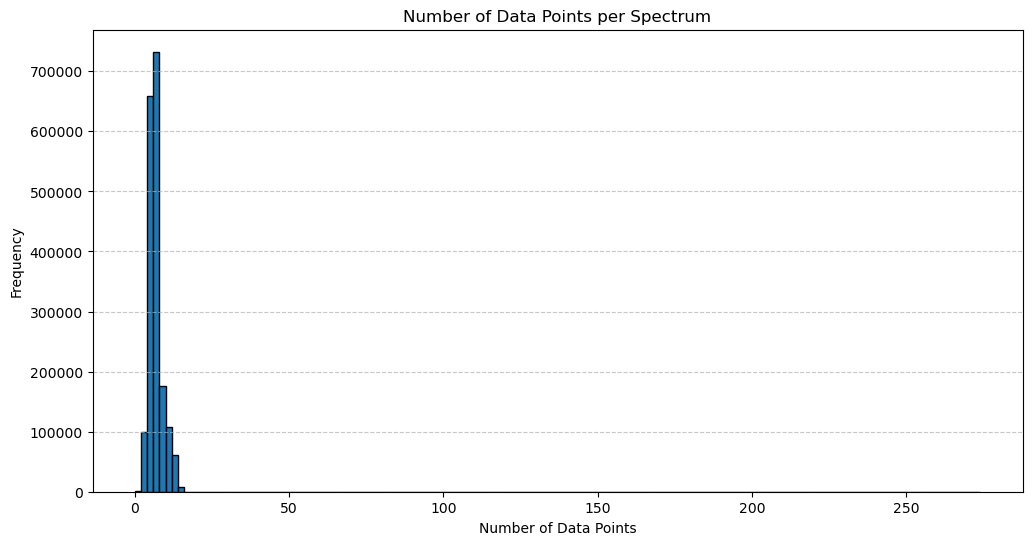

Total spectra: 1844352
Min values: 1
Max values: 273
Mean values: 6.30
Median values: 6.00


In [6]:
spectrum_counts = plot_spectrum_length_histogram(df, 'spectrum', 2)

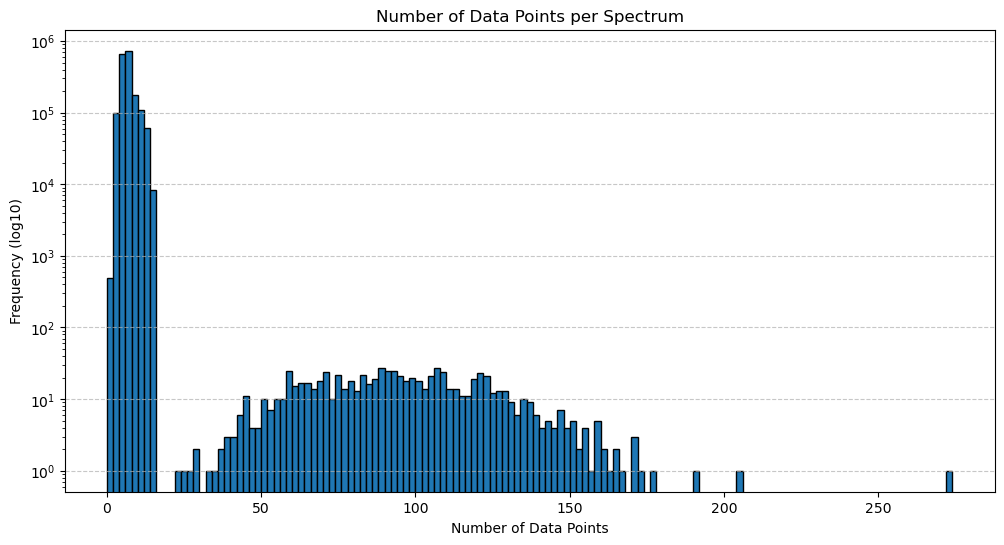

Total spectra: 1844352
Min values: 1
Max values: 273
Mean values: 6.30
Median values: 6.00


In [7]:
spectrum_counts = plot_spectrum_length_histogram(df, 'spectrum', 2, 'log')

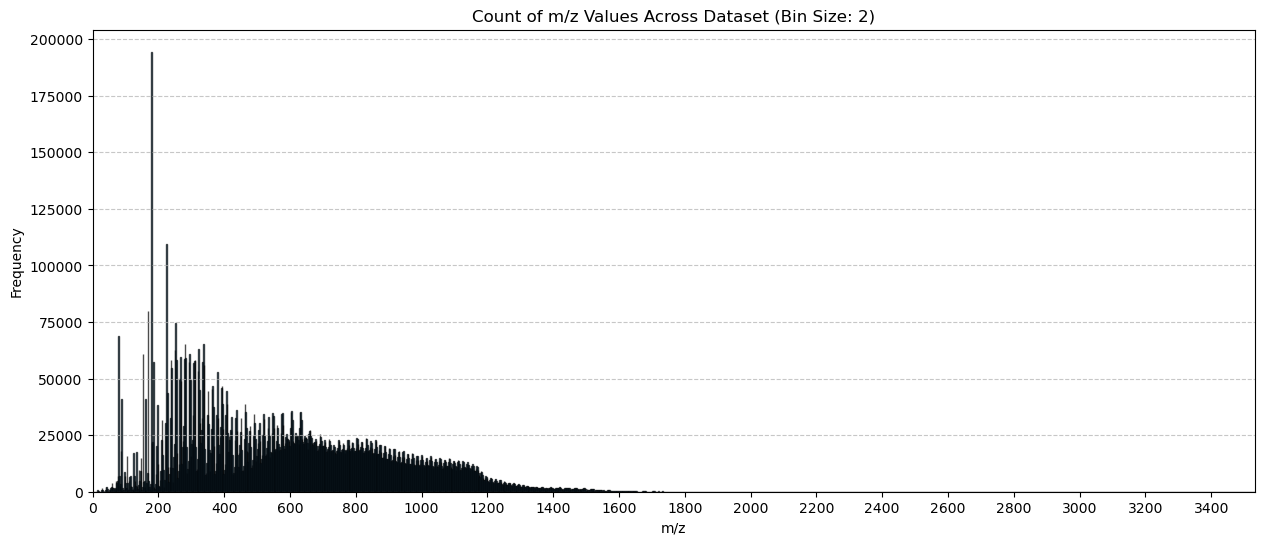

Total m/z values: 11627634
Min m/z: 13.00
Max m/z: 3532.73
Mean m/z: 601.03
Median m/z: 566.52


In [8]:
all_mz_values = plot_mz_histogram(df, spectrum_column='spectrum', bin_size=2, min_mz=0, max_mz=None)

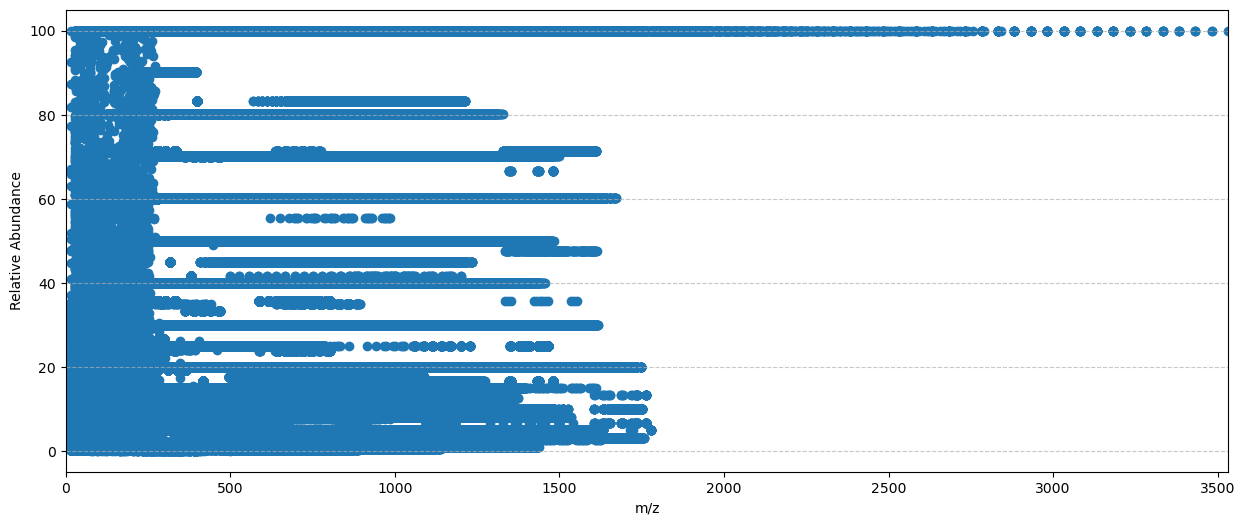

Total data points: 11627634
Min m/z: 13.00
Max m/z: 3532.73
Mean m/z: 601.03
Median m/z: 566.52
Min abundance: 0.01
Max abundance: 100.00
Mean abundance: 33.72
Median abundance: 20.02


In [5]:
plot_all_abundance(df, spectrum_column='spectrum')

In [34]:
df.kind.value_counts()

kind
biological    1354267
In-Silico      490085
Name: count, dtype: int64

In [43]:
len(df.molecular_formula.unique())

19868

In [14]:
len(df.spectrum)

1844352

In [13]:
len(df.spectrum.unique())

1336342

In [52]:
df.spectrum[0].strip()

'[(15.0, 0.4), (27.0, 5.7), (28.0, 6.8), (29.0, 2.8), (30.0, 0.3), (31.0, 0.9), (38.0, 0.5), (39.0, 2.7), (40.0, 2.9), (41.0, 6.7), (42.0, 0.6), (43.0, 42.7), (44.0, 4.4), (45.0, 3.7), (46.0, 0.3), (47.0, 0.1), (51.0, 1.4), (52.0, 5.6), (53.0, 13.0), (54.0, 2.8), (55.0, 2.0), (56.0, 2.9), (57.0, 21.7), (58.0, 49.0), (59.0, 9.6), (60.0, 2.1), (61.0, 0.2), (62.0, 0.3), (63.0, 3.1), (64.0, 2.7), (65.0, 4.6), (66.0, 2.3), (67.0, 2.3), (68.0, 0.9), (69.0, 3.2), (70.0, 3.4), (71.0, 1.9), (72.0, 6.3), (73.0, 29.0), (74.0, 2.9), (75.0, 3.1), (76.0, 3.3), (77.0, 9.3), (78.0, 3.8), (79.0, 4.3), (80.0, 1.1), (81.0, 0.8), (82.0, 0.7), (83.0, 1.3), (84.0, 0.8), (85.0, 0.4), (87.0, 0.6), (88.0, 3.1), (89.0, 3.3), (90.0, 5.6), (91.0, 3.5), (92.0, 2.2), (93.0, 2.3), (94.0, 0.9), (95.0, 1.0), (96.0, 0.6), (99.0, 0.7), (100.0, 0.9), (101.0, 3.5), (102.0, 2.2), (103.0, 2.8), (104.0, 4.9), (105.0, 4.4), (106.0, 1.7), (107.0, 1.6), (108.0, 1.5), (109.0, 0.4), (112.0, 0.2), (113.0, 0.6), (114.0, 1.9), (115.

In [49]:
eval(df.spectrum[0])[:,0]

TypeError: list indices must be integers or slices, not tuple

In [ ]:
x_arr = df.spectrum[0]

In [23]:
df.spectrum

0          [(15.0, 0.4), (27.0, 5.7), (28.0, 6.8), (29.0,...
1          [(15.0, 5.4), (16.0, 0.2), (27.0, 9.7), (28.0,...
2          [(15.0, 4.9), (28.0, 0.1), (42.0, 0.1), (43.0,...
3          [(15.0, 41.0), (16.0, 0.4), (27.0, 4.0), (28.0...
4          [(15.0, 10.8), (16.0, 0.1), (27.0, 7.6), (28.0...
                                 ...                        
1844347    [(243.19602, 12.612613), (227.20111, 100.0), (...
1844348    [(243.19602, 12.612613), (227.20111, 100.0), (...
1844349    [(243.19602, 12.612613), (227.20111, 100.0), (...
1844350    [(243.19602, 12.612613), (227.20111, 100.0), (...
1844351    [(243.19602, 12.612613), (227.20111, 100.0), (...
Name: spectrum, Length: 1844352, dtype: object

In [21]:
df['spectrum'].apply()

dtype('O')

In [5]:
pd.read_csv(csv_pth)

/tmp/ipykernel_1896/19321019.py:1: DtypeWarning: Columns (4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv(csv_pth)


,kind,name,molecular_formula,pubchem_cid,InChI,InChIKey,total_exact_mass,exact_mass,instrument,instrument_type,ms_level,ionization,ionization_mode,spectrum,score
0,biological,"2,3,5-Trimethyl-1H-indole, TMS derivative",C14H21NSi,NaN,InChI=1S/C14H21NSi/c1-10-7-8-14-13(9-10)11(2)1...,KHKJMJPOXGEQGW-UHFFFAOYSA-N,231.144326,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 0.4), (27.0, 5.7), (28.0, 6.8), (29.0,...",3.571429
1,biological,"Ethyl 3-hydroxy-3-methylpentanoate, TMS deriva...",C11H24O3Si,NaN,"InChI=1S/C11H24O3Si/c1-7-11(3,14-15(4,5)6)9-10...",FGZVHXCJVPTHKF-UHFFFAOYSA-N,232.149471,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 5.4), (16.0, 0.2), (27.0, 9.7), (28.0,...",3.571429
2,biological,"L-Valine, TMS derivative",C8H19NO2Si,NaN,"InChI=1S/C8H19NO2Si/c1-6(2)7(9)8(10)11-12(3,4)...",IJGIMCZHMYSSHY-ZETCQYMHSA-N,189.118505,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 4.9), (28.0, 0.1), (42.0, 0.1), (43.0,...",3.571429
3,biological,"Methyl 3-hydroxybutyrate, TMS derivative",C8H18O3Si,NaN,"InChI=1S/C8H18O3Si/c1-7(6-8(9)10-2)11-12(3,4)5...",FHDCVPMIQWHEAE-UHFFFAOYSA-N,190.102521,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 41.0), (16.0, 0.4), (27.0, 4.0), (28.0...",3.571429
4,biological,"1-Butanol, TMS derivative",C7H18OSi,NaN,"InChI=1S/C7H18OSi/c1-5-6-7-8-9(2,3)4/h5-7H2,1-4H3",YTJUXOIAXOQWBV-UHFFFAOYSA-N,146.112692,NaN,NaN,NaN,MS1,NaN,positive,"[(15.0, 10.8), (16.0, 0.1), (27.0, 7.6), (28.0...",3.571429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230539,In-Silico,Cer-EODS d61:4,C61H113NO5,NaN,NaN,NaN,939.861876,938.85460,SCIEX 5600,NaN,MS2,NaN,negative,"[(267.2693, 5.005005), (321.2799, 100.0), (322...",4.500000
230540,In-Silico,Cer-EODS d61:3,C61H115NO5,NaN,NaN,NaN,941.877526,940.87025,SCIEX 5600,NaN,MS2,NaN,negative,"[(267.2693, 5.005005), (321.2799, 100.0), (324...",4.500000
230541,In-Silico,Cer-EODS d61:2,C61H117NO5,NaN,NaN,NaN,943.893176,942.88590,SCIEX 5600,NaN,MS2,NaN,negative,"[(267.2693, 5.005005), (321.2799, 100.0), (326...",4.500000
230542,In-Silico,Cer-EODS d60:3,C60H113NO5,NaN,NaN,NaN,927.861876,926.85460,SCIEX 5600,NaN,MS2,NaN,negative,"[(267.2693, 5.005005), (310.2751, 5.005005), (...",4.500000


In [20]:
interval = np.linspace(2, 1844354, 9, dtype=int)
for i in range(len(interval)-1):
    json_part = "MoNA-export-In-Silico_Spectra_pt"+str(i)+".json"
    search = ("'"+str(interval[i])+","+str(interval[i+1]-1)+"p;"+str(interval[i+1])+"q'")
    print(search)
    
    '''
    subprocess.run(["echo", "[", ">>", json_pth+json_part])
    print(1)
    subprocess.run(["sed", "-n", search, json_pth+json_name, ">>", json_pth+json_part]) 
    print(2)
    subprocess.run(["echo", "]", ">>", json_pth+json_part])
    print(3)
    '''

'2,230545p;230546q'
'230546,461089p;461090q'
'461090,691633p;691634q'
'691634,922177p;922178q'
'922178,1152721p;1152722q'
'1152722,1383265p;1383266q'
'1383266,1613809p;1613810q'
'1613810,1844353p;1844354q'


In [4]:
line = json.loads(read_line(json_pth, 5))

In [9]:
line['compound'][0]

{'kind': 'biological',
 'tags': [],
 'inchi': 'InChI=1S/C8H18O3Si/c1-7(6-8(9)10-2)11-12(3,4)5/h7H,6H2,1-5H3',
 'names': [{'computed': False,
   'name': 'Methyl 3-hydroxybutyrate, TMS derivative',
   'score': 0.0},
  {'computed': False,
   'name': 'Butanoic acid, 3-[(trimethylsilyl)oxy]-, methyl ester',
   'score': 0.0},
  {'computed': False,
   'name': 'Methyl 3-[(trimethylsilyl)oxy]butanoate  #',
   'score': 0.0}],
 'molFile': '\n  CDK     01292305092D\n\n 12 11  0  0  0  0  0  0  0  0999 V2000\n   -3.0099    2.7623    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.1863    4.2623    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -6.3579    5.5613    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -6.9070    3.5123    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -4.8579    2.9632    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.7108    5.0123    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.0099    4.2623    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n 

In [3]:
process_json_file(file_path=json_pth, output_csv=csv_pth, total_lines=5)

Lines in file: 5
Total items processed: 3


In [16]:
#df = pd.read_csv('data/MoNA/experimental.csv')
df = pd.read_json('data/MoNA/MoNA-export-Experimental_Spectra-json/MoNA-export-Experimental_Spectra.json')

In [15]:
df

,kind,name,molecular_formula,pubchem_cid,InChI,InChIKey,total_exact_mass,exact_mass,instrument,instrument_type,ms_level,ionization,ionization_mode,spectrum,score
0,biological,Cefuroxime,C16H16N4O8S,5479529,InChI=1S/C16H16N4O8S/c1-26-19-9(8-3-2-4-27-8)1...,JFPVXVDWJQMJEE-IZRZKJBUSA-N,424.068884,NaN,"ZQ, Waters",NaN,MS1,ESI,negative,"[(100.0, 3.103103), (101.0, 1.201201), (102.0,...",4.444444
1,biological,Cefuroxime,C16H16N4O8S,5479529,InChI=1S/C16H16N4O8S/c1-26-19-9(8-3-2-4-27-8)1...,JFPVXVDWJQMJEE-IZRZKJBUSA-N,424.068884,NaN,"ZQ, Waters",NaN,MS1,ESI,negative,"[(100.0, 0.800801), (104.0, 0.800801), (105.0,...",4.444444
2,biological,Cefuroxime,C16H16N4O8S,5479529,InChI=1S/C16H16N4O8S/c1-26-19-9(8-3-2-4-27-8)1...,JFPVXVDWJQMJEE-IZRZKJBUSA-N,424.068884,NaN,"ZQ, Waters",NaN,MS1,ESI,negative,"[(104.0, 0.800801), (109.0, 1.201201), (110.0,...",4.444444
3,biological,Cefuroxime,C16H16N4O8S,5479529,InChI=1S/C16H16N4O8S/c1-26-19-9(8-3-2-4-27-8)1...,JFPVXVDWJQMJEE-IZRZKJBUSA-N,424.068884,NaN,"ZQ, Waters",NaN,MS1,ESI,negative,"[(168.0, 1.201201), (207.0, 4.304304), (208.0,...",4.444444
4,biological,Cefuroxime,C16H16N4O8S,5479529,InChI=1S/C16H16N4O8S/c1-26-19-9(8-3-2-4-27-8)1...,JFPVXVDWJQMJEE-IZRZKJBUSA-N,424.068884,NaN,"ZQ, Waters",NaN,MS1,ESI,positive,"[(100.0, 2.002002), (101.0, 4.704705), (103.0,...",4.444444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235446,biological,Tyr-His,NaN,NaN,NaN,ZQOOYCZQENFIMC-STQMWFEESA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(93.04726685010395, 0.044603), (107.045901850...",NaN
235447,biological,Ala-Ile,C9H18N2O3,NaN,NaN,ZSOICJZJSRWNHX-ACZMJKKPSA-N,202.131742,201.124466,NaN,NaN,MS2,NaN,negative,"[(40.01807158611198, 0.270492), (41.9960335861...",3.500000
235448,biological,Tyr-Ser,NaN,NaN,NaN,ZSXJENBJGRHKIG-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(76.97261188610099, 0.03235313), (93.04213088...",NaN
235449,biological,Tyr-Ser,NaN,NaN,NaN,ZSXJENBJGRHKIG-UHFFFAOYSA-N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[(41.00518492026108, 0.02885107), (97.04421992...",NaN


In [11]:
df.shape

(235451, 15)

In [ ]:
df[df.score >= 1].shape

(222255, 15)

In [5]:
len(df.id.unique())

235451

In [45]:
df.iloc[0].score

{'impacts': [{'value': 2.0,
   'reason': 'Valid molecular structure(s) provided for biological compound'},
  {'value': 1.0, 'reason': 'Chromatography identified as LC-MS'},
  {'value': 1.0, 'reason': 'Ionization mode/type provided'},
  {'value': 1.0, 'reason': 'MS type/level identified'},
  {'value': 1.0, 'reason': 'Instrument information provided'},
  {'value': -1.0, 'reason': 'No collision energy provided'},
  {'value': 1.0, 'reason': 'Retention time/index provided'},
  {'value': 1.0, 'reason': 'Column information provided'}],
 'score': 4.444444444444445,
 'relativeScore': 0.0,
 'scaledScore': 0.0}

In [46]:
df.iloc[112482].score

nan

In [6]:
val = ''
for i in range(100):
    name = df.iloc[i].compound[:][0]['names'][0]['name']
    if name != val:
        print(name)
    val = name

Cefuroxime
Buspirone
Mexiletine
Molsidomine
Hydroquinidine
Modafinil sulfone
Modafinil
Modafinil acid
Clonazepam
(8S,9S,10R,11S,13S,14S,17R)-11,17-dihydroxy-17-(2-hydroxyacetyl)-10,13-dimethyl-2,6,7,8,9,11,12,14,15,16-decahydro-1H-cyclopenta[a]phenanthren-3-one
Ethylmorphine
Simazine
Hydroxyzine
4-Hydroxypropranolol
3-Hydroxystanozolol
Norverapamil
N-Desmethylmirtazapine
Carbamazepine 10,11-epoxide
3-Hydroxybromazepam
4-Hydroxydebrisoquin


In [7]:
val = ''
for i in range(100):
    name = df.iloc[i].compound[:][0]['metaData'][1]['value']
    #print('#',name)
    if name != val:
        print('#', name)
    val = name

# CO/N=C(/C1=CC=CO1)\C(=O)N[C@H]2[C@@H]3N(C2=O)C(=C(CS3)COC(=O)N)C(=O)O
# c(c4)cnc(n4)N(C1)CCN(CCCCN(C(=O)2)C(=O)CC(C3)(CCC3)C2)C1
# CC(N)COc(c(C)1)c(C)ccc1
# C11H17NO
# CC(N)COc(c(C)1)c(C)ccc1
# CCOC([O-1])=Nc(o2)c[n+1](n2)N(C1)CCOC1
# CC[C@H]1CN2CC[C@H]1C[C@@H]2[C@H](C3=C4C=C(C=CC4=NC=C3)OC)O
# NC(=O)CS(=O)(=O)C(c(c2)cccc2)c(c1)cccc1
# NC(=O)CS(=O)C(c(c2)cccc2)c(c1)cccc1
# OC(=O)CS(=O)C(c(c2)cccc2)c(c1)cccc1
# 571.122500616
# OC(=O)CS(=O)C(c(c2)cccc2)c(c1)cccc1
# [O-1][N+1](=O)c(c3)cc(c(c3)2)C(=NCC(=O)N2)c(c1)c(Cl)ccc1
# C15H10ClN3O3
# [O-1][N+1](=O)c(c3)cc(c(c3)2)C(=NCC(=O)N2)c(c1)c(Cl)ccc1
# C[C@]12CCC(=O)C=C1CC[C@@H]3[C@@H]2[C@H](C[C@]4([C@H]3CC[C@@]4(C(=O)CO)O)C)O
# CCOc(c5)c(O4)c(c(c5)1)C(C2)(C34)C([H])(C=CC(O)3)C(N(C)C2)C1
# CCNc(n1)nc(Cl)nc(NCC)1
# OCCOCCN(C3)CCN(C3)C(c(c2)cccc2)c(c1)ccc(Cl)c1
# CC(C)NCC(O)COc(c1)c(c2)c(ccc2)c(O)c1
# C16H21NO3
# CC(C)NCC(O)COc(c1)c(c2)c(ccc2)c(O)c1
# C[C@]12CC[C@H]3[C@H]([C@@H]1CC[C@]2(C)O)CC[C@@H]4[C@@]3(CC5=C(C4)NNC5=O)C
# C(C(C(C)C)(c(c2)cc

In [17]:
df.iloc[0].compound[:][0]

{'kind': 'biological',
 'tags': [],
 'inchi': 'InChI=1S/C16H16N4O8S/c1-26-19-9(8-3-2-4-27-8)12(21)18-10-13(22)20-11(15(23)24)7(5-28-16(17)25)6-29-14(10)20/h2-4,10,14H,5-6H2,1H3,(H2,17,25)(H,18,21)(H,23,24)/b19-9-/t10-,14-/m1/s1',
 'names': [{'computed': False, 'name': 'Cefuroxime', 'score': 0.0}],
 'molFile': '\n  CDK     01272302502D\n\n 29 31  0  0  1  0  0  0  0  0999 V2000\n   -8.6562    0.6777    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -5.1024    6.7774    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -5.9181    5.5186    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -3.6606    6.3913    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    3.6086   -1.1008    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.3100    1.1700    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.3100   -0.3500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -4.9820    4.3520    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -5.3702    2.9031    0.0000 C   0  0  0  0  0  0

In [19]:
df.iloc[0].metaData[0]

{'name': 'accession',
 'value': 'WA002994',
 'hidden': False,
 'category': 'none',
 'computed': False}

In [9]:
meta_features = [head['name'] for head in df.iloc[0].metaData[:]]
meta_map = {meta_features[i]:i for i in range(len(meta_features))}

In [10]:
meta_map

{'accession': 0,
 'date': 1,
 'author': 2,
 'license': 3,
 'exact mass': 4,
 'instrument': 5,
 'instrument type': 6,
 'ms level': 7,
 'ionization': 8,
 'retention time': 9,
 'column': 10,
 'column temperature': 11,
 'sampling cone': 12,
 'find peak': 13,
 'ionization mode': 14,
 'spectral entropy': 15,
 'normalized entropy': 16}

In [41]:
df.iloc[0].metaData[16]

{'name': 'normalized entropy',
 'value': '0.8310792200354279',
 'hidden': False,
 'category': 'computed',
 'computed': True}

In [12]:
df.iloc[0].metaData[6]

{'name': 'instrument type',
 'value': 'LC-ESI-Q',
 'hidden': False,
 'category': 'none',
 'computed': False}

In [13]:
instrument_types = set()
no_instr = []
for i in range(df.shape[0]):
    try:
        meta_features = [head['name'] for head in df.iloc[i].metaData[:]]
        meta_map = {meta_features[i]:i for i in range(len(meta_features))}
        instrument_types.add(df.iloc[i].metaData[meta_map['instrument type']]['value'])
    except:
        no_instr.append(i)
        continue

print(instrument_types)

{'MALDI-TOFTOF', 'LC-ESI-ITFT', 'LC-APCI-QTOF', 'GC-EI-QQ', 'LIT', 'ESI-TOF', 'MALDI-TOF', 'Quadrupole', 'LC-ESI-HRMS', 'MSD 5875', 'Linear Ion Trap', 'LC-Q-TOF/MS', 'GC-EI-QqQMS', 'LC-ESI-TOF', 'Waters Synapt G2', 'FD-B', 'LC-APCI-Q', 'LC-ESI-Orbitrap', 'Q Exactive Focus Hybrid Quadrupole Orbitrap Mass Spectrometer (Thermo Fisher Scientific)', 'Quattro_QQQ', 'GC-MS', 'GC-FI-TOF', 'MALDI-QIT', 'LC-ESI-ITTOF', 'ESI-ITFT', 'SI-BE', 'CI-B', 'FI-B', 'GC-EI-Q', 'Q-TOF', 'LC-ESI-QTOF', 'ESI-FT', 'EI-B', 'FAB-EBEB', 'LC-ESI-QQ', 'ESI-ITTOF', 'FAB-B', 'ESI-QFT', 'LC-ESI-IT', 'LC-APPI-QQ', 'LC-ESI-Q', 'Orbitrap', 'APCI-ITTOF', 'single quadrupole', 'Waters SYNAPT', 'QIT', 'Q Exactive HF', 'CE-ESI-TOF', 'FAB-BE', 'APCI-Q', 'Flow-injection QqQ/MS', 'LC-ESI-QQQ', 'SYNAPT QTOF, Waters', 'LC-QTOF', 'EI-EBEB', 'MALDI-QITTOF', 'GC-EI-TOF', 'in-silico QTOF', 'GC-EI-TOF (Pegasus III TOF-MS system, Leco; GC 6890, Agilent Technologies)', 'LC-ESI-Q-Orbitrap', 'FAB-EB', 'ESI-QTOF', 'CI-Q', 'QqQ', 'in source 

In [14]:
len(no_instr)

70104

In [15]:
len(instrument_types)

80

In [36]:
x_min = np.inf
y_min = np.inf
x_max = -np.inf
y_max = -np.inf

for i in range(df.shape[0]):
    spec = df.iloc[i].spectrum
    split_spec = spec.split(' ')
    try:
        for j in range(len(split_spec)):
            x_val = float(split_spec[j].split(':')[0])
            y_val = float(split_spec[j].split(':')[1])
            x_min = (x_min, x_val)[(x_val < x_min)]
            x_max = (x_max, x_val)[(x_val > x_max)]
            y_min = (y_min, y_val)[(y_val < y_min)]
            y_max = (y_max, y_val)[(y_val > y_max)]
    except ValueError:
        print(i)
        print(spec)
        continue
print('x min:', x_min)
print('x max:', x_max)
print('y min:', y_min)
print('y max:', y_max)


112482
:104.1071119 594.5363:110.0086715 585.5291:118.0862251 246.53642:118.0862793 342.6221:120.0807688 726.5413:128.0192526 333.17456:132.1017393 91.20578:137.0597008 158.3649:137.107328 271.37442:137.1073359 213.07909:137.1073437 1093.7542:137.1074295 147.31918:154.0861709 54.27508:154.0862404 115.353516:160.0755862 79.08734:166.0861789 350.01596:166.0862158 1426.1228:177.0547134 957.6897:181.1223829 62.575638:181.1224088 349.25473:188.0705685 2722.3687:195.0652401 772.3412:195.1377552 212.49655:195.137856 178.33125:197.1167492 178.9744:205.0971563 2790.91:207.1378495 124.47358:207.1591837 157.39305:213.1484397 96.370094:213.1484989 103.552826:213.1485016 142.65495:217.0972846 134.60591:220.1121116 109.861855:221.1537477 91.444916:223.1327591 360.4656:225.1486861 338.94772:226.9515293 122.49741:229.1411893 1009.8705:240.1020537 131.1589:240.9066778 152.58849:248.2116286 328.30377:249.185136 117.48561:251.2006192 288.8685:255.2196402 531.6454:256.0594877 120.55503:256.0595758 102.353

In [30]:
df.iloc[112482].compound

[{'kind': 'biological',
  'tags': [],
  'inchi': '',
  'names': [],
  'molFile': '',
  'inchiKey': '',
  'metaData': [],
  'classification': []}]

In [17]:
df.iloc[112482].metaData

[{'name': 'sample introduction', 'value': 'Liquid Chromatography (LC)'},
 {'name': 'ms level', 'value': 'MS2'}]

In [18]:
spec2 = df.iloc[112482].spectrum

In [19]:
spec2

':104.1071119 594.5363:110.0086715 585.5291:118.0862251 246.53642:118.0862793 342.6221:120.0807688 726.5413:128.0192526 333.17456:132.1017393 91.20578:137.0597008 158.3649:137.107328 271.37442:137.1073359 213.07909:137.1073437 1093.7542:137.1074295 147.31918:154.0861709 54.27508:154.0862404 115.353516:160.0755862 79.08734:166.0861789 350.01596:166.0862158 1426.1228:177.0547134 957.6897:181.1223829 62.575638:181.1224088 349.25473:188.0705685 2722.3687:195.0652401 772.3412:195.1377552 212.49655:195.137856 178.33125:197.1167492 178.9744:205.0971563 2790.91:207.1378495 124.47358:207.1591837 157.39305:213.1484397 96.370094:213.1484989 103.552826:213.1485016 142.65495:217.0972846 134.60591:220.1121116 109.861855:221.1537477 91.444916:223.1327591 360.4656:225.1486861 338.94772:226.9515293 122.49741:229.1411893 1009.8705:240.1020537 131.1589:240.9066778 152.58849:248.2116286 328.30377:249.185136 117.48561:251.2006192 288.8685:255.2196402 531.6454:256.0594877 120.55503:256.0595758 102.35313:256

In [20]:
spec2_split = spec2.split(' ')

In [21]:
len(spec2_split)

622

In [22]:
spec2_split[0].split(':')[1]

'104.1071119'

In [23]:
spec_x = np.zeros_like(spec2_split)
spec_y = np.zeros_like(spec2_split)

bad_ind = []

for i in range(len(spec2_split)):
    try:
        x = float(spec2_split[i].split(':')[0])
        y = float(spec2_split[i].split(':')[1])
        spec_x[i] = x
        spec_y[i] = y
    except ValueError:
        bad_ind.append(i)
    except TypeError:
        print(i, spec2_split[i])
        bad_ind.append(i)
    

In [24]:
bad_ind

[0, 621]

In [25]:
spec_x = spec_x[1:621].astype(np.float64)
spec_y = spec_y[1:621].astype(np.float64)

In [33]:
spec_x.max()

27669.504

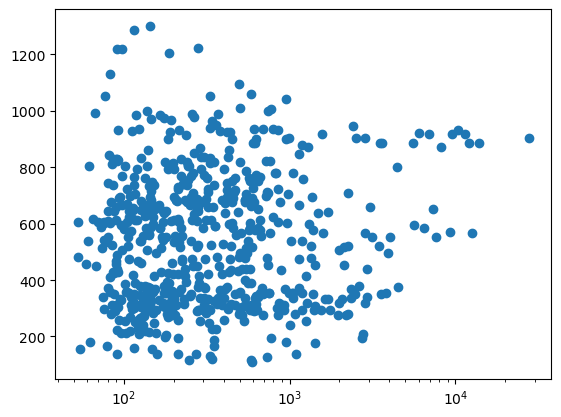

In [28]:
plt.scatter(spec_x, spec_y)
plt.xscale('log')

In [ ]:
spec_y

In [ ]:
spec_x

In [ ]:
plt.scatter(spec_x, spec_y)

In [7]:
spec = df.iloc[0].spectrum

In [8]:
split_spec = spec.split(' ')

In [9]:
print(split_spec[:5])
print(split_spec[-5:])

['100:3.103103', '101:1.201201', '102:1.201201', '103:1.201201', '104:15.315315']
['423:22.322322', '424:5.505506', '429:0.800801', '446:0.800801', '449:0.800801']


In [10]:
for i in range(len(split_spec)):
    split_spec[i] = float(split_spec[i].split(':')[1])


In [11]:
split_spec

[3.103103,
 1.201201,
 1.201201,
 1.201201,
 15.315315,
 11.011011,
 2.402402,
 0.800801,
 3.103103,
 12.512513,
 7.107107,
 1.201201,
 1.201201,
 1.201201,
 5.105105,
 25.525526,
 3.903904,
 2.002002,
 5.105105,
 2.002002,
 2.702703,
 4.704705,
 3.503504,
 3.103103,
 1.601602,
 4.304304,
 4.704705,
 3.903904,
 1.201201,
 2.402402,
 5.105105,
 3.503504,
 1.601602,
 1.201201,
 0.800801,
 2.402402,
 3.503504,
 2.702703,
 5.905906,
 1.601602,
 0.800801,
 2.002002,
 0.800801,
 0.800801,
 0.800801,
 1.201201,
 2.702703,
 2.002002,
 4.704705,
 5.905906,
 2.402402,
 7.407407,
 2.702703,
 2.402402,
 1.601602,
 1.601602,
 1.601602,
 9.409409,
 4.704705,
 2.002002,
 0.800801,
 1.201201,
 2.002002,
 0.800801,
 1.601602,
 0.800801,
 0.800801,
 2.002002,
 1.601602,
 1.201201,
 5.505506,
 4.304304,
 1.601602,
 0.800801,
 3.103103,
 3.103103,
 0.800801,
 4.304304,
 1.601602,
 100.0,
 12.512513,
 6.306306,
 2.002002,
 0.800801,
 1.601602,
 2.002002,
 0.800801,
 1.601602,
 0.800801,
 5.505506,
 2.00200

In [12]:
import numpy as np

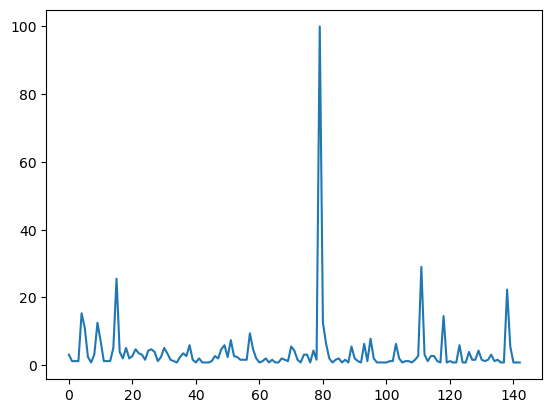

In [15]:
plt.plot(split_spec)

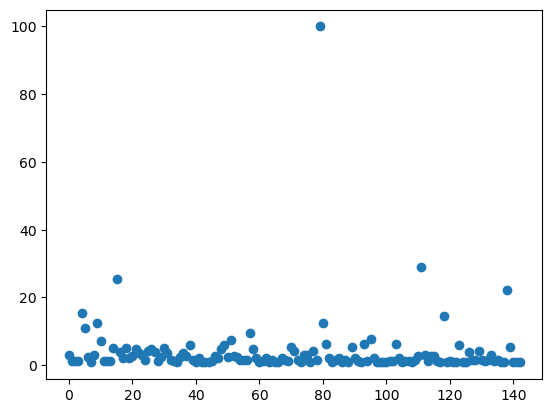

In [13]:
plt.scatter(np.arange(0, len(split_spec)),split_spec)